<a href="https://colab.research.google.com/github/TurboPug2101/NLP/blob/main/Sentiment_Analysis_AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A comparison of sentiment analysis models using NLP **

---


1.   **BERT MODEL**

      BERT is a popular NLP approach achieving high accuracies in tasks like sentiment analysis and text summarization. To reduce resource intensity, a smaller BERT model with 4 transformer blocks, hidden size of 512, and 8 attention heads was used. With 85.5% accuracy on the test set, training took around 30 minutes. Comparisons were made with non-contextualized embedding models, as contextualization wasn't crucial for the specific use case, where movie quality depended less on context.
2.   **NAIVE BAYES MODEL**
      
      The Naive Bayes model is a simple and fast classification algorithm used in NLP tasks. It assumes conditional independence between features and performs well for sentiment analysis. By preprocessing the text and using a Bag-of-Words approach, the NLTK Naive Bayes classifier achieved 83% accuracy in classifying positive and negative movie reviews. It offers insights into informative words like "underrate" and "ridiculous". A good choice for basic binary text classification.



3.  **Word2Vec Embedding with LSTM**

      Word2Vec embeddings combined with LSTM were used for our deep learning model. Pretrained models with 100-dimensional embeddings from gensim were utilized. The dataset was preprocessed using NLTK, and the reviews were padded to a length of 200 words. The model achieved around 80% accuracy, with potential for further improvements.


4. **TF-IDF**

      TF-IDF is a well-known approach for determining the significance of a word in a document (Eqs. 1 and 2). The number of times a term appears in a text divided by the
      total number of words in the document yields the frequency of the term, t. The Inverse
      Document Frequency (IDF) method determines a term’s relevance. Some phrases, such
      as “is”, “an”, and “and”, are widely used yet have little meaning


# **Reasons TO Choose BERT Model**

---
Contextualized Embeddings: BERT generates word embeddings that take into account the surrounding words, capturing nuanced word meanings and improving representation quality.

Pre-training and Fine-tuning: BERT is pre-trained on vast amounts of unlabeled data, learning general language knowledge. This pre-training enables fine-tuning on specific tasks using smaller labeled datasets, enhancing performance.

Bidirectional Dependencies: BERT considers both preceding and following words, allowing it to capture long-range dependencies and understand the context in which words appear, leading to improved understanding.

State-of-the-Art Performance: BERT has achieved remarkable results in various NLP benchmarks and tasks, surpassing previous models and setting new standards for accuracy and performance.

Multilingual Support: BERT models are available for multiple languages, facilitating cross-lingual applications and supporting a diverse range of linguistic contexts.

Resource Requirements: BERT's advanced architecture and large number of parameters demand substantial computational resources for training and inference, making it computationally intensive.

Large Model Size: BERT models can be sizable due to their complex architecture and extensive parameterization, necessitating ample storage space for deployment and usage.



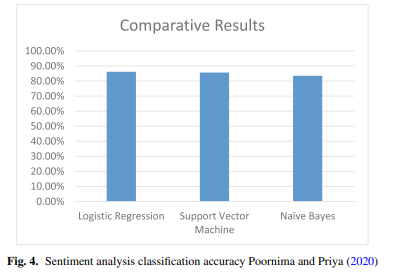

In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00


In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from bs4 import BeautifulSoup
import re

# Instantiate Model

In [6]:
tokenizer=AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model=AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Encode,Calc Sentiment

In [34]:
tokens=tokenizer.encode('it is okay',return_tensors='pt')

In [35]:
tokens

tensor([[  101, 10197, 10127, 44810, 10158,   102]])

In [36]:
tokenizer.decode(tokens[0])

'[CLS] it is okay [SEP]'

In [37]:
result=model(tokens)

In [38]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[-1.8636,  0.6185,  2.8479,  0.5518, -1.8955]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [39]:
result.logits

tensor([[-1.8636,  0.6185,  2.8479,  0.5518, -1.8955]],
       grad_fn=<AddmmBackward0>)

In [40]:
torch.argmax(result.logits)

tensor(2)

In [41]:
int(torch.argmax(result.logits))+1

3

In [43]:
import pandas as pd

df = pd.read_csv(r'/content/amazon_reviews.csv')
print(df)

      Unnamed: 0  reviewerName  overall  \
0              0           NaN      4.0   
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  2014-07-23       138   
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513 

In [45]:
df=df[['reviewText','overall']]

In [46]:
df

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4911,Used this for extending the capabilities of my...,5.0
4912,Great card that is very fast and reliable. It ...,5.0
4913,Good amount of space for the stuff I want to d...,5.0


In [47]:
df.isnull().sum()

reviewText    1
overall       0
dtype: int64

In [48]:
df.dropna(inplace=True)


<ipython-input-48-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [77]:
df['word_count'] = df['reviewText'].apply(lambda x: len(x.split()))

# Filter out the reviews greater than 40 words
df = df[df['word_count'] <= 15]

# Drop the 'word_count' column
df = df.drop('word_count', axis=1)

In [78]:
df.shape

(99, 3)

In [79]:
df.reset_index(drop=True, inplace=True)

In [71]:
df['model_output'] = None


,reviewText,overall,model_output
0,No issues.,4.0,4
1,"Purchased this for my device, it worked as adv...",5.0,5
2,it works as expected. I should have sprung for...,4.0,3
3,Works in a HTC Rezound. Was running short of ...,5.0,5
4,"in my galaxy s4, super fast card, and am total...",5.0,4
...,...,...,...
2992,MicroSD card works flawlessly with my digital ...,5.0,None
2993,I bought this to stretch the capability of my ...,5.0,None
2994,Used this for extending the capabilities of my...,5.0,None
2995,Good amount of space for the stuff I want to d...,5.0,None


# **Using Bert Model**

In [80]:
for index, row in df.iterrows():
    review = row['reviewText']

        # Tokenize the review with a maximum length of 1404
    tokens = tokenizer.encode(review, max_length=1404, truncation=True, padding=True, return_tensors='pt')


    sentiment = model(tokens)[0].argmax().item()+1
    df.at[index, 'model_output'] = sentiment


In [81]:
df

,reviewText,overall,model_output
0,No issues.,4.0,4
1,THE NAME OF ITSELF SPEAKS OUT. GO SANDISK GO!,5.0,1
2,"Great storage, has not failed yet after about ...",5.0,5
3,Best price anywhere!!!,5.0,5
4,still have 26 gb left came in HARD CASE FORE ...,4.0,3
...,...,...,...
94,Works great; should last a long time!,5.0,5
95,fast and holds all my music and larger apps.,5.0,5
96,Yep. Works like it should.,5.0,4
97,exactly what it says and cheap,5.0,5


# TO CALCULATE MODEL ACCURACY

In [82]:
correct_predictions = df[df['overall'] == df['model_output']].shape[0]

# Calculate the total number of rows
total_rows = df.shape[0]

# Calculate accuracy
accuracy = correct_predictions / total_rows

In [83]:
print(accuracy)

0.7474747474747475


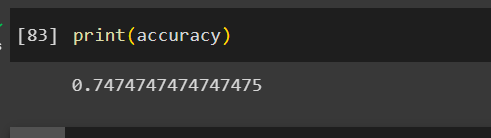

# Thus BERT Model has an accuracy of 74.7%